Here's the quote from **[USGS](https://earthquake.usgs.gov/)**, which stands for **United States Geological Survey.**
>**Can you predict earthquakes?**<br>
No. Neither the USGS nor any other scientists have ever predicted a major earthquake. We do not know-how, and we do not expect to know how any time in the foreseeable future. USGS scientists can only calculate the probability that a significant earthquake will occur in a specific area within a certain number of years.<br><br>
>**At what magnitude does damage begin to occur in an earthquake?**<br>
It isn't that simple. There is not one magnitude above which damage will occur. It depends on other variables, such as the distance from the earthquake, what type of soil you are on, etc. That being said, damage does not usually occur until the earthquake magnitude reaches somewhere above 4 or 5.

<h3 style='text-align:center'>The earthquake depth and its magnitude categories are as follow.</h3>

|Class|Magnitude|
|:------|-----------:|
|Great| 8 or more|
|Major| 7 - 7.9|
|Strong| 6 - 6.9|
|Moderate| 5 - 5.9|
|Light| 4 - 4.9|
|Minor| 3 - 3.9|

|Class| Depth(km)|
|:------|-----------:|
|Shallow|up to 70|
|intermediate|70 to 300|
|deep|greater than 300|


In [1]:
%store -r __importing_Lib

In [2]:
__importing_Lib

matplotlib inline backend and ggplot style are used.
Mplotlib version : 3.1.3
Numpy version	 : 1.18.1
Pandas version	 : 1.0.1
Seaborn version	 : 0.10.0
Folium version	 : 0.10.0
Other imported is: Waffle      
		 : datetime      
		 : base64      
		 : Json


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from folium import plugins
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
import graphviz
import os
from ipywidgets import interact
import matplotlib.gridspec as gridspec
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz2.38/bin/'
pd.set_option('display.max_columns', 25, 
              'display.max_rows', 100)

```python
eq_df = pd.read_csv('query.csv')```

```python
boolean = eq_df.place.str.split().str[-1]
boolean = boolean.map(lambda x: x in ['Burma', 'Myanmar'])
eq_df = eq_df[boolean]
eq_df['local_time'] = eq_df.time.map(lambda x: pd.Timestamp(x, tz='Asia/Yangon'))
eq_df.sort_values(['latitude'], ascending=False, inplace=True)
eq_df.index = range(len(eq_df))
eq_df.head()```

```python
X = eq_df.longitude
Y = eq_df.latitude
xmin, xmax = X.min()-1, X.max()+2
ymin, ymax = Y.min()-2.8, Y.max()+2
xmin, xmax, ymin, ymax```

```python
groups = eq_df.groupby(['mag'], as_index=False, sort=False)
groups```

```python
proj = ccrs.Mercator()
plt.figure(figsize=(18,9))
ax = plt.axes(projection=proj)
ax.set_extent((xmin, xmax, ymin, ymax))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for lab, grp in groups:
    x, y = grp.longitude, grp.latitude
    ax.plot(x, y, '.', transform=ccrs.Geodetic())
plt.legend(loc=1);```

```python
kachin = [358, 369, 317, 316, 329, 312, 342, 328, 322, 319, 303, 302, 308, 321, 336]
sagaing = ([100, 144, 154, 167, 191, 193, 157, 138, 131, 133,
           196, 158, 151, 142, 149, 178, 183, 135, 130, 
           129, 141, 146, 148, 169, 172, 188, 195, 119, 120, 121, 122, 126] + [3, 12, 28, 85, 92, 94, 98] + 
          [207, 250, 216, 219, 218, 227, 230, 204, 203, 211, 205, 212, 217,
           206, 214, 222, 223, 225, 228, 229, 232, 233, 235, 242,
           245, 244, 239, 240, 243, 256, 251, 253, 254, 252, 259, 264, 280, 
           297, 282, 273, 269, 272, 281, 276, 285, 291, 283, 262, 279, 298, 
           296, 287, 284, 271, 268, 260, 258, 274, 288]+
          [idx for idx in range(300,400) if idx not in kachin])

loc_dict = {}
for i in range(400):
    if i not in sagaing:
        loc_dict[i] = 'Kachin'
    else:
        loc_dict[i] = 'Sagaing'
loc_dict ```

```python
kachin = [406]
shan = [435, 532, 620, 758, 837, 852, 853, 858, 874, 876, 877, 891, 899, 907, 913, 929, 972, 988, 985,
        971, 998, 997, 986, 970, 914, 956, 961, 944, 938, 937, 918, 950, 975, 964, 952, 946, 945, 930, 920,
        919, 924, 927, 926, 935, 943, 965, 991, 928, 995, 1095, 1069, 1042, 1002, 1057, 1052, 1062, 1047, 1040,
        1019, 1070, 1089, 1026, 1027, 1075, 1031, 1018, 1011, 1035, 1102,1109,1110, 1111, 1116, 1120, 1123, 1124,
        1125, 1127, 1128, 1132, 1136, 1140, 1141, 1148, 1149, 1153, 1155, 1159, 1160, 1170, 1173, 1174, 1177, 1178,
        1180, 1183, 1186, 1188, 1189, 1192, 1193, 1198, 1215, 1202, 1207, 1204]
chin = [493, 483, 478, 460, 459, 432, 521, 542, 548, 585, 677, 781, 794, 776, 773, 746, 815, 821, 826, 829, 839,
        840, 851, 859, 864, 917, 923, 931, 940, 949, 955, 966, 969, 977, 983, 984, 987, 990, 1008, 1024, 1021, 1012,
        1001, 1014, 1013, 1005, 1000, 1028, 1038, 1037, 1041, 1049, 1051, 1054, 1058, 1060, 1053, 1055, 1059, 1061,
        1065, 1066, 1063, 1080, 1090, 1092, 1094, 1088, 1086, 1084, 1098, 1097, 1101, 1106, 1112]
near_chin = [429, 442, 444]
mandalay = [577, 611, 635, 638, 647, 646, 697, 688, 676, 645, 715, 718, 719, 725, 731, 745, 750, 759, 772, 792, 796,
            798, 822, 951, 980, 1045, 1046, 1085, 1093, 1096, 1079, 1100, 1131, 1164, 1172]
magway = [778, 795, 809, 812, 831, 833, 835, 846, 861, 863, 865, 866, 870, 882, 892, 895, 896, 898, 903, 905, 908, 909,
          910, 911, 922, 932, 933, 939, 959, 962, 963, 967, 999, 994, 992, 981, 976, 993, 996, 989, 978, 979, 953, 948,
          960, 968, 973, 954, 957, 974, 982, 1003, 1010, 1015, 1016, 1023, 1020, 1004, 1022, 1017, 1009, 1006, 1007,
          1025, 1032, 1039, 1050, 1044, 1043, 1033, 1036, 1048, 1029, 1030, 1034, 1056, 1073, 1077, 1081, 1072, 1067,
          1068, 1074, 1083, 1078, 1071, 1064, 1076, 1087, 1091, 1099, 1104, 1113, 1119, 1121, 1142, 1146, 1154, 1161, 
          1165, 1156, 1152, 1144, 1139, 1181, 1176, 1169, 1162, 1151, 1133, 1122, 1117, 1108, 1107, 1105, 1114, 1126,
          1137, 1138, 1130, 1135, 1143, 1150, 1157, 1166, 1168, 1175, 1187, 1196, 1197, 1195, 1190, 1184, 1199, 1200,
          1206, 1208, 1209, 1210, 1211, 1214, 1216, 1217, 1219, 1220, 1221, 1222, 1225, 1226, 1227, 1228, 1230, 1231, 
          1232, 1235, 1237, 1238, 1239, 1240, 1242, 1243, 1244, 1246, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255,
          1256, 1257, 1260, 1261, 1265, 1266, 1267, 1270, 1271, 1272, 1274, 1275, 1276, 1277, 1279, 1280, 1281, 1282,
          1284, 1285, 1286, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1296, 1297, 1298, 1299, 1303, 1305, 1316, 1313, 
          1308, 1306, 1301, 1302, 1304, 1307]
rakhine = [1082, 1103, 1118, 1129, 1145, 1158, 1134, 1147, 1171, 1182, 1194, 1163, 1185, 1212, 1224, 1245, 1262, 1269, 
           1321, 1322, 1345, 1348, 1356, 1377, 1384, 1389, 1394, 1396, 1398, 1405, 1412]
near_rakhine = [1115]
rk_coast = [1167, 1205, 1247, 1264, 1273, 1309, 1335, 1336, 1354, 1378, 1390, 1400, 1401, 1408, 1409, 1411, 1416, 1423, 
            1427, 1432, 1433, 1434, 1441, 1443, 1455, 1465, 1466, 1473, 1483]
Nay_Pyi_Taw = [1179, 1191, 1201, 1203, 1213, 1218, 1223, 1233, 1229, 1236, 1241, 1234, 1258, 1259, 1263, 1268]
Bago = [1283, 1287, 1295, 1311, 1312, 1314, 1315, 1317, 1319, 1320, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330,
        1331, 1332, 1333, 1334, 1338, 1339, 1340, 1342, 1343, 1344, 1346, 1347, 1349, 1350, 1351, 1352, 1353, 1355, 
        1357, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1379,
        1381, 1382, 1383, 1385, 1386, 1387, 1388, 1391, 1392, 1393, 1395, 1397, 1404, 1407, 1406, 1410, 1413, 1414, 
        1415, 1419, 1422, 1437]
Kayah = [1278, 1300, 1310]
bog = [1337, 1341, 1399]
Ayeyarwady = [1376, 1358, 1367, 1380, 1402, 1403, 1421, 1424, 1425, 1426, 1436, 1438, 1444, 1445, 1446, 1448, 1449, 
              1450, 1451, 1452, 1454, 1456, 1461, 1462, 1469, 1471, 1472, 1474, 1475, 1476, 1477, 1479, 1480, 1484,
              1486, 1489, 1496]
outofmyan = [1318, 1417]
Kayin = [1418]
Yangon = [1420, 1428, 1429, 1430, 1431, 1435, 1439, 1440, 1442, 1447, 1453, 1457, 1458, 1460, 1463, 1464, 1468, 1467,
          1459]
mmcoast = [1470, 1478, 1485, 1493, 1498, 1495, 1497, 1494, 1491, 1492, 1490, 1488, 1482, 1481, 1487, 1499, 1500, 1501, 
           1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519,
           1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537,
           1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554]
tot = (kachin + shan + chin + near_chin + mandalay + magway + rakhine + near_rakhine + rk_coast + Nay_Pyi_Taw +
       Bago + Kayah + bog + Ayeyarwady + outofmyan + Kayin + Yangon + mmcoast)

for i in range(400, len(eq_df)):
    if i not in tot:
        loc_dict[i] = 'Sagaing'
    elif i in kachin:
        loc_dict[i] = 'Kachin'
    elif i in chin:
        loc_dict[i] = 'Chin'
    elif i in shan:
        loc_dict[i] = 'Shan'
    elif i in near_chin:
        loc_dict[i] = 'near_chin'
    elif i in mandalay:
        loc_dict[i] = 'Mandalay'
    elif i in magway:
        loc_dict[i] = 'Magway'
    elif i in rakhine:
        loc_dict[i] = 'Rakhine'
    elif i in near_rakhine:
        loc_dict[i] = 'near_rakhine'
    elif i in rk_coast:
        loc_dict[i] = 'Coast of rakhine'
    elif i in Nay_Pyi_Taw:
        loc_dict[i] = 'Nay Pyi Taw'
    elif i in Bago:
        loc_dict[i] = 'Bago'
    elif i in Kayah:
        loc_dict[i] = 'Kayah'

    elif i in bog:
        loc_dict[i] = 'Bay of Bengal'
    elif i in Ayeyarwady:
        loc_dict[i] = 'Ayeyarwady'
    elif i in outofmyan:
        loc_dict[i] = 'outofmyan'  
    elif i in Kayin:
        loc_dict[i] = 'Kayin'
    elif i in Yangon:
        loc_dict[i] = 'Yangon'
    elif i in mmcoast:
        loc_dict[i] = 'mmcoast'

print(len(loc_dict))
loc_dict```


```python
mmeq_df = pd.DataFrame(columns=['local_time', 'date', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'location'])
for row in eq_df.itertuples():
    idx,datetime = row.Index, row.local_time
    mmeq_df.loc[idx] = (datetime, datetime.date(),
                        row.latitude, row.longitude,
                        row.depth, row.mag, row.magType, loc_dict[idx])
mmeq_df.head()```

In [4]:
def mag_group(x):
    grp = 0
    while (x>grp or x==grp):
        grp+=1
    return f'[{grp-1}, {grp})'
mag_group(6.9)

'[6, 7)'

In [5]:
mmeq_df = pd.read_csv('myanmar_earth_data1.csv', index_col=0, parse_dates=['local_time', 'date'])
drop_idx = [429, 442, 444, 1115, 1318, 1417]
name_dict = {'Coast of rakhine': 'Coast of Myanmar', 'mmcoast': 'Coast of Myanmar'}
dn_dict = {'Wednesday': 2, 'Sunday': 6, 'Friday': 4, 'Saturday': 5,
           'Thursday': 3, 'Monday': 0, 'Tuesday': 1}
mmeq_df.drop(drop_idx, inplace=True)
mmeq_df.location.replace(name_dict, inplace=True)
mmeq_df['year'] = mmeq_df.local_time.dt.year
mmeq_df['month'] = mmeq_df.local_time.dt.month
mmeq_df['month_name'] = mmeq_df.local_time.dt.month_name()
mmeq_df['day'] = mmeq_df.local_time.dt.day
mmeq_df['day_name'] = mmeq_df.local_time.dt.day_name()
mmeq_df['day_num'] = mmeq_df.day_name.replace(dn_dict)
mmeq_df['hour'] = mmeq_df.local_time.dt.hour
mmeq_df['minute'] = mmeq_df.local_time.dt.minute
mmeq_df['maggrp'] = mmeq_df.mag.map(lambda x: mag_group(x))
mmeq_df['is_shallow'] = mmeq_df.depth<=70
mmeq_df.index = range(len(mmeq_df))
mmeq_df.head()

,local_time,date,latitude,longitude,depth,mag,magType,location,year,month,month_name,day,day_name,day_num,hour,minute,maggrp,is_shallow
0,1988-12-28 06:59:36.620000+06:30,1988-12-28,26.989,96.955,21.9,4.6,mb,Kachin,1988,12,December,28,Wednesday,2,6,59,"[4, 5)",True
1,2006-06-11 06:55:18.970000+06:30,2006-06-11,26.952,97.411,35.0,3.8,mb,Kachin,2006,6,June,11,Sunday,6,6,55,"[3, 4)",True
2,2005-07-08 00:11:10.890000+06:30,2005-07-08,26.938,97.254,36.0,4.4,mb,Kachin,2005,7,July,8,Friday,4,0,11,"[4, 5)",True
3,1985-06-08 00:53:58.590000+06:30,1985-06-08,26.931,96.195,33.0,4.9,mb,Sagaing,1985,6,June,8,Saturday,5,0,53,"[4, 5)",True
4,2011-04-09 10:03:01.320000+06:30,2011-04-09,26.923,97.200,29.2,4.4,mb,Kachin,2011,4,April,9,Saturday,5,10,3,"[4, 5)",True


In [6]:
mmap = folium.Map(location=[19.7253, 96.1194], zoom_start=5)
cluster = plugins.MarkerCluster(name='Marker').add_to(mmap)
folium.LayerControl().add_to(mmap)
for df in mmeq_df.itertuples():
    html = f'''<div style="font-size:9pt; background-color:steelblue;
                           overflow:auto; color:white; padding:5px 2px;
                           line-height:1.35;">
               Date<span style="padding-left:32px;">:</span> {df.date:%Y-%m-%d}<br/>
               Magnitude : {df.mag} ({df.magType})</div>''' 
    iframe = folium.IFrame(html, width=155, height=58)
    popup = folium.Popup(iframe)
    folium.Marker([df.latitude,df.longitude],name='marker',
                   popup=popup).add_to(cluster)
mmap.save('final_mm.html')

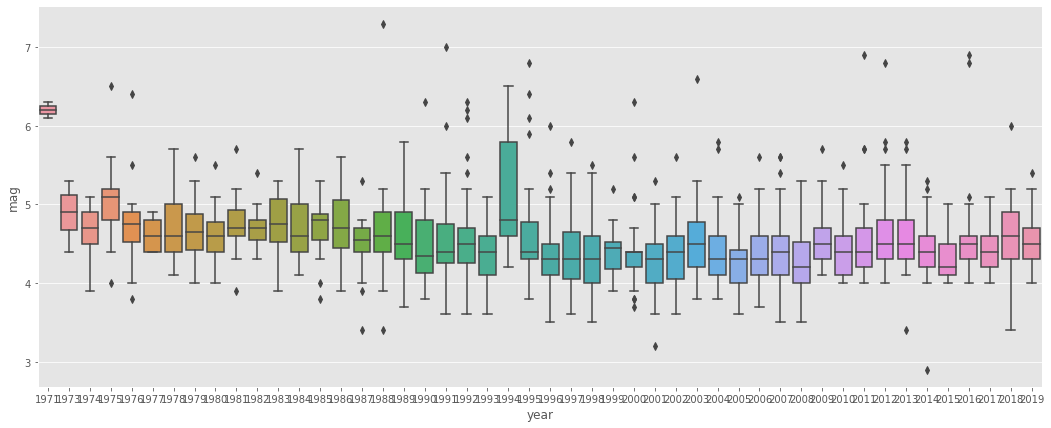

In [7]:
plt.figure(figsize=(18, 7))
sns.boxplot('year', 'mag', data=mmeq_df);

In [8]:
count_df = mmeq_df.groupby('location').size()
mmap = folium.Map(location=[19.9940,96.0864], zoom_start=5)
folium.Choropleth(
    geo_data='Applied Data Science Specialization(IBM)/Data Visualization with Python/myanmar.json',
    data=count_df,
    key_on='feature.properties.name',
    line_color='black',
    fill_color='YlOrRd',
    nan_fill_color='white',
    fill_opacity=1, 
    line_opacity=0.5,
    legend_name ='Magnitude',
    name="earthquake of Myanmar",
    overlay=True,
    highlight=True).add_to(mmap)
folium.LayerControl().add_to(mmap)
mmap.save('eq_Choropleth_mm.html')
#mmap

In [9]:
count_df.sort_values(ascending=False).reset_index().rename(columns={0:'frequency'})

,location,frequency
0,Sagaing,616
1,Kachin,218
2,Magway,213
3,Shan,106
4,Coast of Myanmar,100
5,Bago,76
6,Chin,75
7,Ayeyarwady,37
8,Mandalay,35
9,Rakhine,31


In [10]:
hours_df = mmeq_df.groupby(['hour', 'maggrp']).size().reset_index()
hours_df[hours_df.maggrp=='[5, 6)'].sort_values(0, ascending=False)

,hour,maggrp,0
70,18,"[5, 6)",14
21,5,"[5, 6)",12
25,6,"[5, 6)",12
10,2,"[5, 6)",11
59,15,"[5, 6)",11
37,9,"[5, 6)",9
63,16,"[5, 6)",9
2,0,"[5, 6)",8
13,3,"[5, 6)",8
17,4,"[5, 6)",8


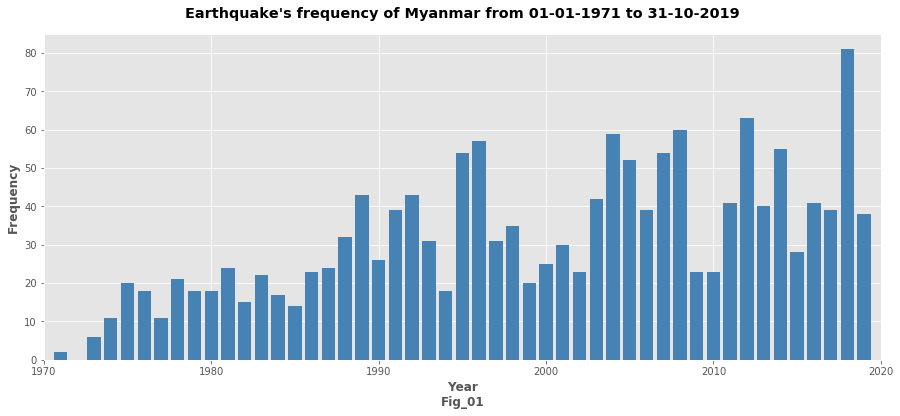

In [11]:
plt.figure(figsize=(15, 6))
year_df = mmeq_df.groupby('year').size().reset_index()
year_df.columns = 'year', 'frequency'
plt.bar(year_df.year, year_df.frequency, color='steelblue')
plt.xlim([1970, 2020])
plt.xlabel('Year\nFig_01', fontdict={'weight':'bold'})
plt.ylabel('Frequency', fontdict={'weight':'bold'})
plt.title("Earthquake's frequency of Myanmar from 01-01-1971 to 31-10-2019",
          y=1.03, fontdict={'weight':'bold'});

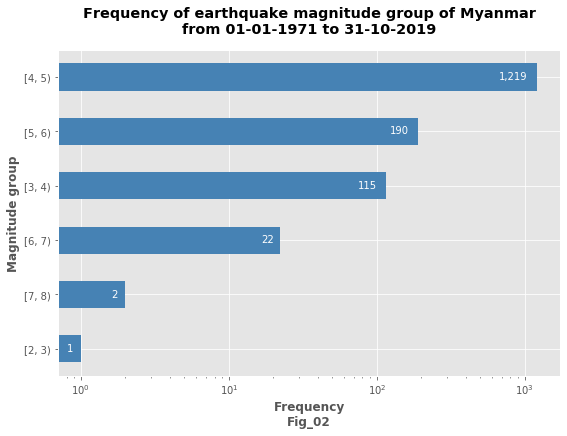

In [12]:
plt.figure(figsize=(9, 6))
mag = mmeq_df.groupby('maggrp').size().sort_values()
mag.plot.barh(color='steelblue')
plt.semilogx()
for y,x in enumerate(mag):
    xl = x*0.8 if x < 3 else x*0.75 if x < 100 else x*0.65 if x < 1200 else x*0.55
    plt.text(xl, y-0.05, f'{x:,}', color='white')
plt.xlabel('Frequency\nFig_02', fontdict={'weight':'bold'})
plt.ylabel('Magnitude group', fontdict={'weight':'bold'})
plt.title("Frequency of earthquake magnitude group of Myanmar\nfrom 01-01-1971 to 31-10-2019",
          y=1.03, fontdict={'weight':'bold'});

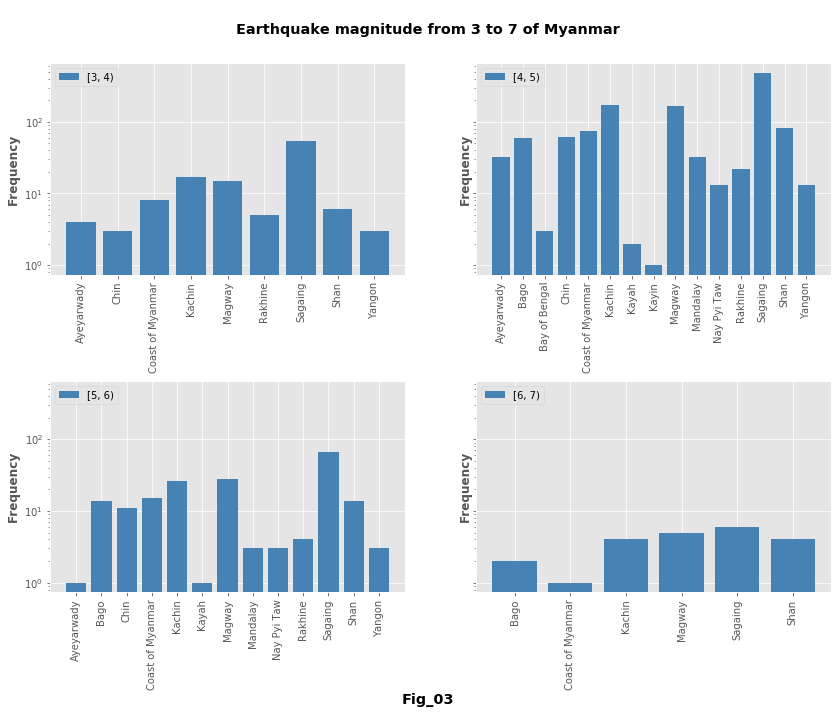

In [13]:
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(14, 10))
grouping = mmeq_df.groupby(['location', 'maggrp'], as_index=False).size().reset_index()
grouping.columns = 'location', 'maggrp', 'frequency'
maggrps =['[3, 4)', '[4, 5)', '[5, 6)', '[6, 7)']
axs = ax1, ax2, ax3, ax4
for maggrp, ax in zip(maggrps, axs):
    grp_ff = grouping[grouping.maggrp==maggrp]
    ax.bar(grp_ff.location, grp_ff.frequency, label=maggrp, color='steelblue')
    ax.set_yscale('log')
    ax.legend(loc=2)
    ax.set_ylabel('Frequency', fontdict={'weight':'bold'})
    for lab in ax.get_xticklabels():
        lab.set_rotation(90)
plt.subplots_adjust(top=0.86, hspace=0.5)
fig.text(.5, 0.9, '\nEarthquake magnitude from 3 to 7 of Myanmar',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'})
fig.text(.5, -0.03, 'Fig_03',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'});

In [14]:
@interact(variable=['month_name', 'year', 'day', 'day_name', 'hour', 'minute'])
def barplot(variable):
    plt.figure(figsize=(14,7))
    order = ['[2, 3)', '[3, 4)', '[4, 5)', '[5, 6)', '[6, 7)', '[7, 8)']
    sort_val = 'month' if variable=='month_name' else 'day_num' if variable=='day_name' else None
    ax = sns.countplot(variable, hue='maggrp', hue_order=order,
                       data=mmeq_df.sort_values(sort_val) if sort_val else mmeq_df)
    if variable == 'year':
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    plt.legend(loc=1, bbox_to_anchor=(1.12, 1.015),
               title='Magnitude', title_fontsize='13',
               labelspacing=0.9, borderpad=0.95)
    plt.ylabel('Frequency', fontdict={'weight':'bold'})
    plt.title(f"Earthquake's frequency of Myanmar for each {variable}",
              y=1.03, fontdict={'weight':'bold'});

interactive(children=(Dropdown(description='variable', options=('month_name', 'year', 'day', 'day_name', 'hour…

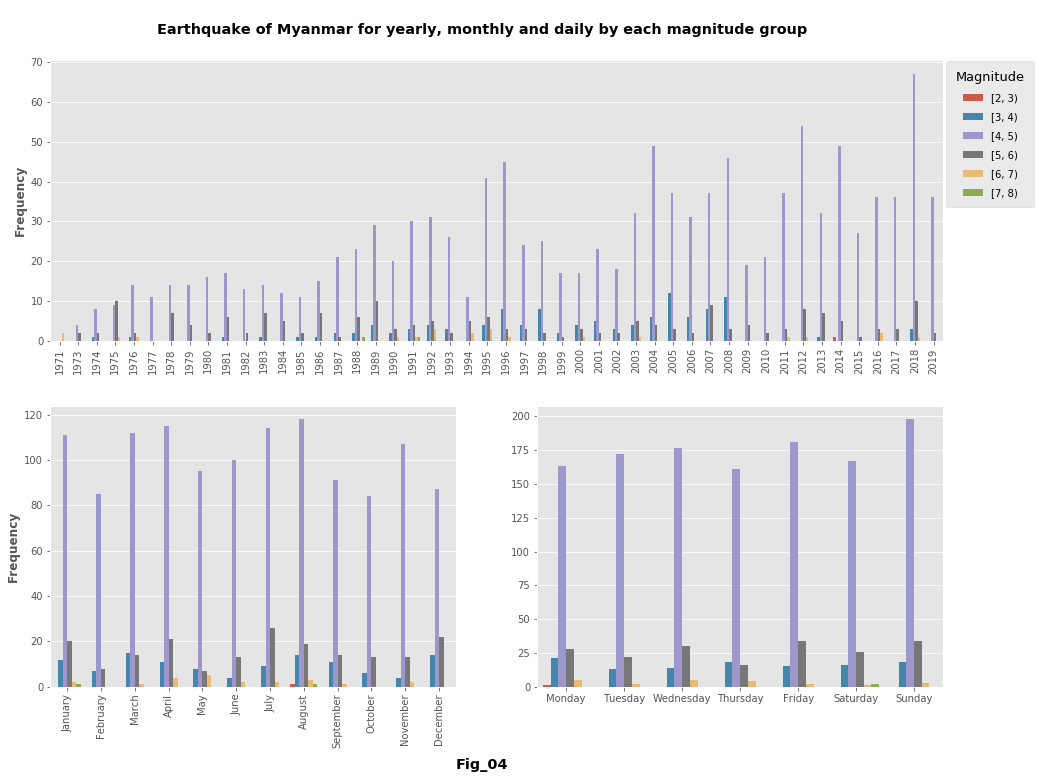

In [15]:
fig = plt.figure(figsize=(16, 12))
gspec = gridspec.GridSpec(2, 2, top=0.85, hspace=0.23)
upper_count = plt.subplot(gspec[0, :])
left_count = plt.subplot(gspec[1, 0]) #, sharey=right_count
right_count = plt.subplot(gspec[1, 1])
variable=['year', 'month_name', 'day_name']
order = ['[2, 3)', '[3, 4)', '[4, 5)', '[5, 6)', '[6, 7)', '[7, 8)']
axs = [upper_count, left_count, right_count]
for var, ax in zip(variable, axs):
    sort_val = 'month' if var=='month_name' else 'day_num' if var=='day_name' else None
    ax = sns.countplot(var, hue='maggrp', hue_order=order, ax=ax,
                       data=mmeq_df.sort_values(sort_val) if sort_val else mmeq_df)
    ax.legend().remove()
    ax.set(xlabel=None, ylabel=None)
    if var != 'day_name':
        ax.set_ylabel('Frequency', fontdict={'weight':'semibold'})
        for lab in ax.get_xticklabels():
            lab.set_rotation(90)
    if var == 'year':
        ax.legend(loc=1, bbox_to_anchor=(1.108, 1.014),
                  title='Magnitude', title_fontsize='13',
                  labelspacing=0.9, borderpad=0.95)
fig.text(.5, 0.88, '\nEarthquake of Myanmar for yearly, monthly and daily by each magnitude group',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'})
fig.text(.5, 0.03, 'Fig_04',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'});

In [16]:
mmeq_df[(mmeq_df.maggrp=='[7, 8)') | (mmeq_df.maggrp=='[2, 3)')].sort_values('mag').iloc[:, 1:]

,date,latitude,longitude,depth,mag,magType,location,year,month,month_name,day,day_name,day_num,hour,minute,maggrp,is_shallow
1472,2014-08-04,16.1393,96.0109,10.0,2.9,ml,Coast of Myanmar,2014,8,August,4,Monday,0,15,41,"[2, 3)",True
512,1991-01-05,23.6130,95.9010,19.7,7.0,mw,Sagaing,1991,1,January,5,Saturday,5,21,27,"[7, 8)",True
242,1988-08-06,25.1490,95.1270,90.5,7.3,mw,Sagaing,1988,8,August,6,Saturday,5,7,6,"[7, 8)",False


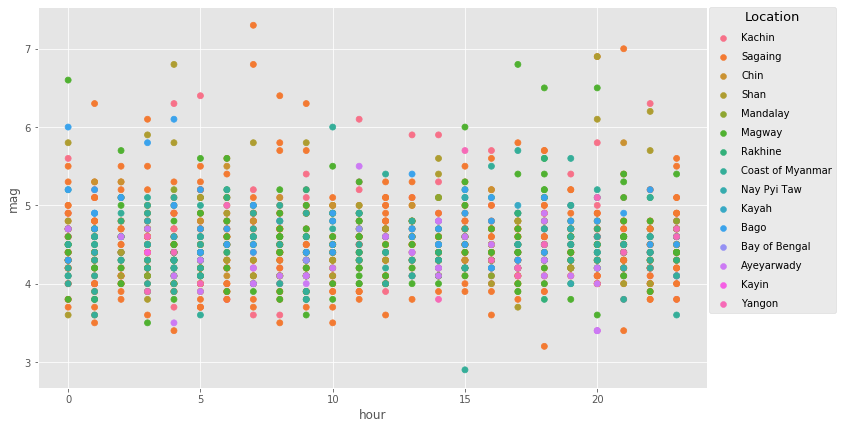

In [17]:
plt.figure(figsize=(12, 7))
ax = sns.scatterplot('hour', 'mag',
                     hue='location',
                     data=mmeq_df,
                     edgecolor=None)
h,l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc=1, 
          bbox_to_anchor=(1.2, 1.015), 
          title='Location',
          title_fontsize='13',
          labelspacing=0.9);

In [18]:
mag_to_num_dict = {'[2, 3)':0, '[3, 4)':1, '[4, 5)':2, '[5, 6)':3, '[6, 7)':4, '[7, 8)':5}
num_to_mag_dict = {0:'[2, 3)', 1:'[3, 4)', 2:'[4, 5)', 3:'[5, 6)', 4:'[6, 7)', 5:'[7, 8)'}
loc_to_num_dict = {'Ayeyarwady':0,'Bago':1, 'Chin':2, 'Kachin':3, 'Kayah':4, 'Kayin':5, 'Magway':6, 'Mandalay':7,
                   'Mon':8, 'Nay Pyi Taw':9, 'Rakhine':10, 'Sagaing':11, 'Shan':12, 'Tanintharyi':13, 'Yangon':14,
                   'Coast of Myanmar':15, 'Bay of Bengal':16}
num_to_loc_dict = {0:'Ayeyarwady',1:'Bago', 2:'Chin', 3:'Kachin', 4:'Kayah', 5:'Kayin', 6:'Magway', 7:'Mandalay',
                   8:'Mon', 9:'Nay Pyi Taw', 10:'Rakhine', 11:'Sagaing', 12:'Shan', 13:'Tanintharyi', 14:'Yangon',
                   15:'Coast of Myanmar', 16:'Bay of Bengal'}
ml_df = mmeq_df.groupby(['year', 'hour', 'maggrp']).size().reset_index() # 'year',  'location',,  'mag'
ml_df.rename(columns={0:'frequency'}, inplace=True)
ml_df = ml_df.replace(loc_to_num_dict).replace(mag_to_num_dict) #[ 1,  3,  6,  4,  2,  8,  5, 10,  7,  9, 13, 12]
ml_df[ml_df.frequency==7]

,year,hour,maggrp,frequency
612,2004,19,2,7
845,2014,5,2,7


In [19]:
X = ml_df.drop(columns='frequency')
y = ml_df['frequency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))
#result = model.predict(X_test)
#sum(y_test == result.round(1))/sum(y_test)

0.5202020202020202


In [20]:
model.predict([[2020, 10, 2]])

array([3.])

In [21]:
sum(model.predict(X_test) == y_test.values)/len(X_test)

0.5202020202020202

In [22]:
grouping[grouping.location=='Yangon']

,location,maggrp,frequency
42,Yangon,"[3, 4)",3
43,Yangon,"[4, 5)",13
44,Yangon,"[5, 6)",3


In [23]:
mmeq_df.mag.min(), mmeq_df.mag.max()

(2.9, 7.3)

In [24]:
@interact(location=grouping.location.unique())
def region_mg_plot(location):
    plt.figure(figsize=(8,6))
    sub_df = grouping[grouping.location==location]
    ax = sns.barplot('maggrp', 'frequency', data=sub_df)    

interactive(children=(Dropdown(description='location', options=('Ayeyarwady', 'Bago', 'Bay of Bengal', 'Chin',…

In [25]:
grouping[grouping.maggrp=='[4, 5)'].sort_values('frequency', ascending=False)

,location,maggrp,frequency
34,Sagaing,"[4, 5)",487
16,Kachin,"[4, 5)",171
23,Magway,"[4, 5)",165
39,Shan,"[4, 5)",82
12,Coast of Myanmar,"[4, 5)",75
8,Chin,"[4, 5)",61
3,Bago,"[4, 5)",60
1,Ayeyarwady,"[4, 5)",32
26,Mandalay,"[4, 5)",32
31,Rakhine,"[4, 5)",22


In [26]:
1219/190

6.41578947368421

In [27]:
yangon = mmeq_df[mmeq_df.location=='Yangon']
yangon

,local_time,date,latitude,longitude,depth,mag,magType,location,year,month,month_name,day,day_name,day_num,hour,minute,maggrp,is_shallow
1414,2005-12-23 04:00:34+06:30,2005-12-23,17.6000,95.9710,10.00,4.4,mb,Yangon,2005,12,December,23,Friday,4,4,0,"[4, 5)",True
1422,2002-11-16 23:25:48.890000+06:30,2002-11-16,17.4100,96.0310,33.00,4.7,mb,Yangon,2002,11,November,16,Saturday,5,23,25,"[4, 5)",True
1423,2017-09-11 20:26:11.510000+06:30,2017-09-11,17.4028,95.9326,10.00,4.6,mb,Yangon,2017,9,September,11,Monday,0,20,26,"[4, 5)",True
1424,2017-03-13 20:49:06.670000+06:30,2017-03-13,17.3991,95.9998,10.00,5.1,mb,Yangon,2017,3,March,13,Monday,0,20,49,"[5, 6)",True
1425,2007-02-22 03:20:21.550000+06:30,2007-02-22,17.3950,95.9180,10.00,4.6,mb,Yangon,2007,2,February,22,Thursday,3,3,20,"[4, 5)",True
1429,2017-09-11 07:49:43.010000+06:30,2017-09-11,17.3198,95.9530,10.00,4.2,mb,Yangon,2017,9,September,11,Monday,0,7,49,"[4, 5)",True
1433,2017-03-30 17:04:52.380000+06:30,2017-03-30,17.2360,95.8795,5.99,4.2,mb,Yangon,2017,3,March,30,Thursday,3,17,4,"[4, 5)",True
1434,2005-03-29 22:01:03.120000+06:30,2005-03-29,17.2220,95.9740,146.50,4.2,mb,Yangon,2005,3,March,29,Tuesday,1,22,1,"[4, 5)",False
1436,1998-11-30 18:30:48.950000+06:30,1998-11-30,17.1010,96.1060,10.00,4.5,mb,Yangon,1998,11,November,30,Monday,0,18,30,"[4, 5)",True
1441,2004-11-29 16:54:59.930000+06:30,2004-11-29,16.9000,96.4600,85.00,4.3,mb,Yangon,2004,11,November,29,Monday,0,16,54,"[4, 5)",False


In [28]:
sum(yangon.depth<=70)/len(yangon)*100, len(yangon)

(84.21052631578947, 19)

In [29]:
sorted(yangon.depth.unique())

[5.99, 10.0, 17.0, 22.7, 33.0, 50.56, 85.0, 97.6, 146.5]

- [x] Finish my changes
- [ ] Push my commits to GitHub
- [ ] Open a pull request

I’m not a seismologist, so I don’t know much about the earthquake. If you want to get more information, click on the link **[USGS](https://earthquake.usgs.gov/)**. The [earthquake dataset](https://earthquake.usgs.gov/earthquakes/search/) starts from **01-01-1971 to 31-10-2019.**<br><br>
The location in the earthquake dataset means where the **[epicenter](https://earthquake.usgs.gov/learn/glossary/?term=epicenter)** was. How far away from the epicenter suffers shaking is depending on many factors. **USGS** provides the epicenter of the earthquake, which doesn’t include the distance of the affected area.<br><br>
In the **choropleth map**, we can see that **Sagaing** is the highest earthquake-affected region in **Myanmar**. It got the **616 times** earthquake that is about **three times** higher than **Kachin and Magway**. The **white color** means there is no epicenter in the region that doesn’t mean it didn’t suffer an earthquake.<br><br>
Before I move on to the topic, I want to share interval notation usage. The information is intended for anyone who wants to brush up their knowledge again. When using interval notation, parenthesis refers to open interval(exclusive) and square bracket mean close interval(inclusive). Please see the attached image and, you will get more information. And also, thank the image creator.<br> <img src='interval_notation.jpg' width="500"/><br><br>
The earthquake that occurred in **Myanmar** is about **32 times per annum (Fig_01)** and, the **[magnitude](https://earthquake.usgs.gov/learn/glossary/?term=magnitude)** of the earthquake is **[2.9, 7.3].**
The most occurrence earthquake magnitude in **Myanmar** is **[4, 5)** and, its frequency is **1,219** that is about **6.4 times** larger than the second most occurrence **(Fig_02)**. Magnitude **seven and above** earthquake just happened two times in **Myanmar** and, all of those occurred in the **Sagging region**.<br><br>
60.2% of the earthquake in Myanmar occurred in the shallow depth.
The earthquake that happened in **Yangon** was **nineteen times**. Magnitude **[4, 5)** took place **thirteen times** and, **[3, 4) and [5, 6)** occurred **three times** each. **84.2\%** of the earthquake in **Yangon** took place at **shallow depth.**<br><br>
Finally, we can conclude that an earthquake is a randomly occurred event based on **fig_04**.

```python
from IPython.display import YouTubeVideo
vid = YouTubeVideo('bj0Eys2sdbU', align='middle')
display(vid) #{'align':'middle'}```

In [30]:
[s+100 if s%2==1 else s+1000 if s==0 else s+200 for s in range(10)]

[1000, 101, 202, 103, 204, 105, 206, 107, 208, 109]

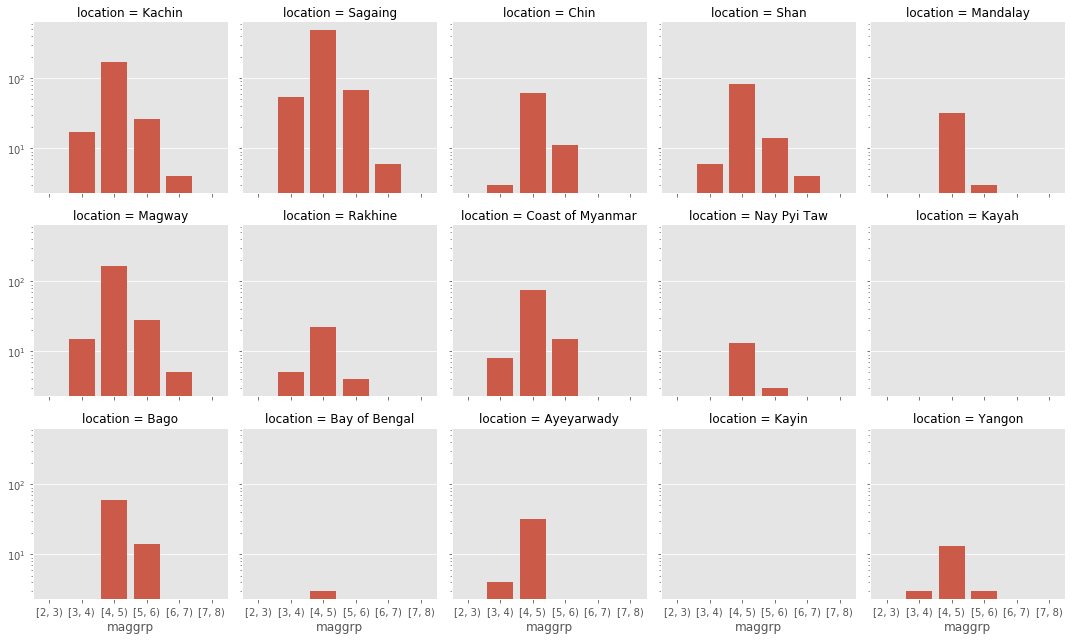

In [31]:
g = sns.FacetGrid(mmeq_df, col='location', col_wrap=5)
g = g.map(sns.countplot, 'maggrp', order=order)
g.set(yticks=np.logspace(-1,3,5), yscale='log', yticklabels=[0,1,10,100,1000]);

In [32]:
shallow_df = pd.crosstab(mmeq_df.location, mmeq_df.is_shallow)
shallow_df.columns = 'false', 'true'
shallow_df['total'] = shallow_df.sum(axis=1)
shallow_df.reset_index(inplace=True)
shallow_df['margin'] = (shallow_df.true/shallow_df.total*100).round(2)
shallow_df.sort_values('margin', inplace=True)
shallow_df.index = range(len(shallow_df))
shallow_df

,location,false,true,total,margin
0,Sagaing,428,188,616,30.52
1,Magway,120,93,213,43.66
2,Chin,15,60,75,80.00
3,Mandalay,6,29,35,82.86
4,Kachin,35,183,218,83.94
5,Yangon,3,16,19,84.21
6,Rakhine,3,28,31,90.32
7,Ayeyarwady,1,36,37,97.30
8,Bago,2,74,76,97.37
9,Coast of Myanmar,2,98,100,98.00


In [33]:
sum(shallow_df.true)*100/sum(shallow_df.total), 13/15*100

(60.16785022595223, 86.66666666666667)

```python
from IPython.display import HTML
import io
video = io.open('Guru.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
<video controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
</video>'''.format(encoded.decode('ascii')))```
https://image.slidesharecdn.com/therealnumbers-snichols-151029045701-lva1-app6891/95/the-real-numbers-36-638.jpg?cb=1446094727